# 社会结构的多元正态分布模型

多元正态分布那么贫乏的模型，我倒想看看能做到什么程度。我们的目标是做一个未来社会的游戏，其主要操作手段就是控制这个多元总体，
使得其向科学进步，消灭人类，建立人工智能未来的目标前进。

虽然用多元正态描述人类总体（的几个特征）虽然貌似可行，然而却有几个问题。

1. 它怎么描述分类变量？它和分类变量的联合分布显然就不是多元正态分布了，那是什么？会需要很多多元正态分布吗？如何描述这些分布之间的关系？
也许混合高斯分布可以部分解决我的问题，然而现在却没网可以查。
2.  它怎么描述变化？当我们说人类的某些属性（如观点）发生了变化时，我们在说什么？期望变化（加个10%什么的）无论直接改还是用矩阵都很直接。
但协方差矩阵呢？直接改协方差矩阵一般导致它失去半正定性，不太管用，要么就用矩阵？但矩阵的换元意义如何解释？前一段时间的某些变量的0.9倍与另一个0.95倍得到下一个阶段的变量是什么鬼？或者我们把它们总看成某些外生变量的换元的，然后总是只通过改变外生变量的分布与外生变量的换元矩阵来做到这一点？

即使这些问题都解决了，那么即使我们成功刻画了社会的一个瞬间，以及瞬间与瞬间之间的变换方式。那么这个粗糙的表示又给了我们什么呢？

我想到了一个有趣的系统，我们可以设一个特定规模的样本，每回合从当前总体中抽出这个样本。然后与事件相关的触发器回去查是否满足条件（如100
规模样本中若有40小于-1的财富水平，20个大于1的财富水平，5个个体共产主义思潮大于1,小于-1财富水平中又有5个暴力水平大于1，则发生“阶级斗争”事件）
，这些事件在特定参数下显然有分析的确定概率，但却十分复杂，不那么好算，这正是我们所要的。这说明简洁的模型却可以表示很复杂的东西。
就像辣鸡SVM装上合适的核函数一样。

这些事件有的可以决策，有的强制作用。干脆把政策机会也搞成根据条件随机生成的好了。这些事件的条件里那些参数可能也是随机的，应对样本规模太大时
“统计量”变异太小。它们的作用最终会构成一个矩阵，直接变换状态随机向量$X$，$\mu \to A\mu,\Sigma \to A\Sigma A^T$。
这个矩阵不一定是常数阵，其可以利用当时的参数信息和样本信息来做一些特殊的变化，让它最终以矩阵方式起作用是保证变换结果依然是多元正态分布。

我们来举几个静态例子说明如何利用多元正态分布进行表征

设$X_1$表示个体财富水平，$X_2$表示个体权力水平，$X_3$表示个体知识水平。

则封建贵族社会中，财富水平普遍低下，权力水平与财富水平与知识水平联系不大。也许可以由以下模型刻画

$$
\mu = 
\begin{bmatrix}
-1 \\
0 \\
-1
\end{bmatrix}
\\
\Sigma = 
\begin{bmatrix}
\end{bmatrix}
$$

In [6]:
rcov <- function(n, r, Lam=NULL){
    if(is.null(Lam)){
        lam <- rep(0,n)
        lam[1:r] <- runif(r,0.5,1.5)
        Lam <- diag(lam)
    }
    A <- matrix(runif(n*n,-2,2),n)
    return(t(A) %*% Lam %*% A)
}

rmultinorm <- function(n,mu,Sigma){
    res <- eigen(Sigma)
    Lambda <- diag(res$values)
    P <- res$vectors
    r <- replicate(n,as.vector( P %*% Lambda^(1/2) %*% rnorm(length(mu))) + mu)
    return(r)
}


In [12]:
cor(t(rmultinorm(100,c(0,0,0),rcov(3,3))))

1.0000000,-0.2678312,0.4911893
-0.2678312,1.0000000,-0.4973475
0.4911893,-0.4973475,1.0000000


In [13]:
rcov(3,3)

3.591719,-3.801352,-1.414234
-3.801352,4.828771,1.927540
-1.414234,1.927540,3.760501


In [14]:
feudal <- read.csv("feudal.csv")
feudal

X,weathy,power,knowledge
皇家贵族,2.00,2.00,0.50
大贵族,1.00,1.00,0.40
小贵族,0.80,0.80,0.30
小贵族,0.60,0.70,0.20
骑士,0.20,0.50,0.10
骑士,0.20,0.40,0.10
骑士,0.20,0.30,0.00
骑士,0.20,0.20,0.00
宗教领主,0.50,1.00,1.00
教士,0.20,0.20,0.50


In [15]:
cov(feudal[,-1])

,weathy,power,knowledge
weathy,0.18287456,0.12689024,0.05545296
power,0.12689024,0.15532520,0.05193089
knowledge,0.05545296,0.05193089,0.04570848


In [16]:
cor(feudal[,-1])

,weathy,power,knowledge
weathy,1.0000000,0.7528884,0.6065264
power,0.7528884,1.0000000,0.6163203
knowledge,0.6065264,0.6163203,1.0000000


In [1]:
mao <- read.csv("mao.csv")
mao

X,weathy,power,knowledge
领导人,0.50,3.00,1.00
被批判的领导人,0.00,0.00,1.00
官僚,0.30,1.50,0.75
官僚,0.25,0.75,0.50
官僚,0.20,0.50,0.25
被批判的官僚,0.00,0.00,1.00
被批判的官僚,0.00,0.00,0.75
被批判的官僚,0.00,0.00,0.50
被批判的官僚,0.00,0.00,0.25
知识分子,0.10,0.20,0.60


In [2]:
cov(mao[,-1])

,weathy,power,knowledge
weathy,0.009337979,0.04746516,0.01108014
power,0.047465157,0.26951945,0.07513066
knowledge,0.011080139,0.07513066,0.11735192


In [21]:
cor(mao[,-1])

,weathy,power,knowledge
weathy,1.0000000,0.9461357,0.3347138
power,0.9461357,1.0000000,0.4224517
knowledge,0.3347138,0.4224517,1.0000000


In [24]:
apply(mao[,-1],2,mean)

weathy      power  knowledge 
0.05714286 0.17976190 0.23571429

In [25]:
apply(feudal[,-1],2,mean)

weathy     power knowledge 
0.2571429 0.1833333 0.1380952

In [28]:
t(rmultinorm(43,apply(mao[,-1],2,mean),cov(mao[,-1])))

weathy,power,knowledge
-0.009457988,-0.08911064,0.1729111691
0.146572334,0.79076479,0.3396843756
0.213435470,1.22423696,0.6820363244
0.047980533,0.17624654,0.2926889861
0.070784168,0.43290423,0.6874608515
-0.004902231,-0.00225865,0.3085977017
0.151293999,0.58878339,0.5107225413
0.138445514,0.70957761,0.3749670538
0.166031534,0.75024413,0.2062386982
0.138334288,0.66890261,0.9028886765


In [32]:
df <- data.frame(t(rmultinorm(43,apply(mao[,-1],2,mean),cov(mao[,-1]))))
head(df)

weathy,power,knowledge
0.06655816,0.18689171,-0.34290068
0.09930566,0.33751413,0.05163136
-0.06397259,-0.03029248,0.99519598
-0.07918391,-0.76775458,-0.34890237
-0.02383454,-0.23280796,0.40716568
0.13343688,0.46095571,-0.47926991


In [36]:
lm(power ~ weathy,data=df)


Call:
lm(formula = power ~ weathy, data = df)

Coefficients:
(Intercept)       weathy  
    -0.1301       5.1553  


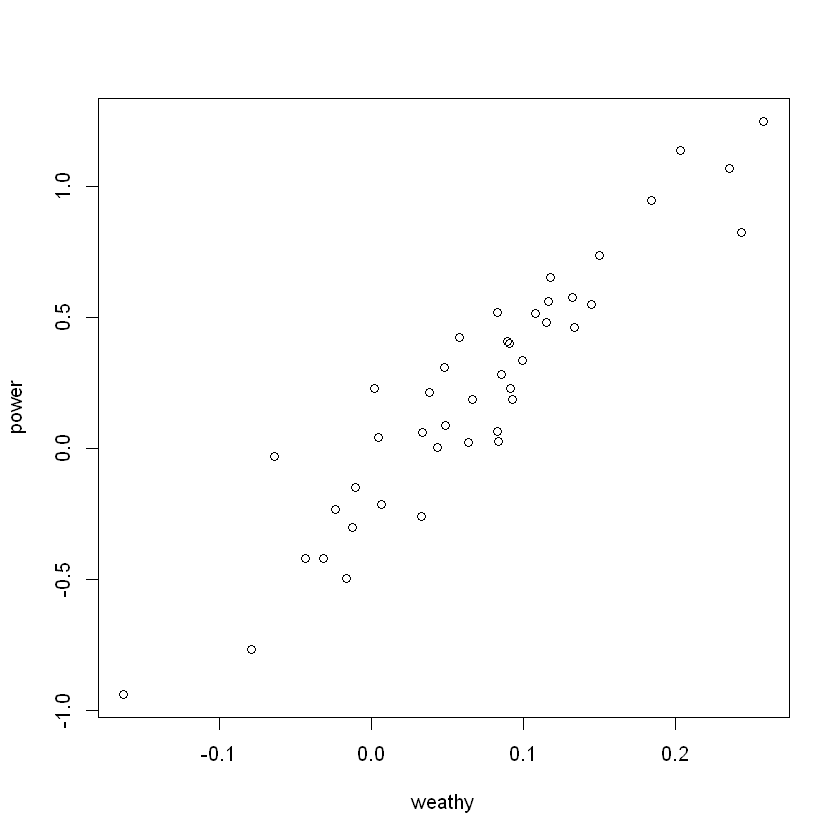

In [37]:
plot(power ~ weathy,data=df)

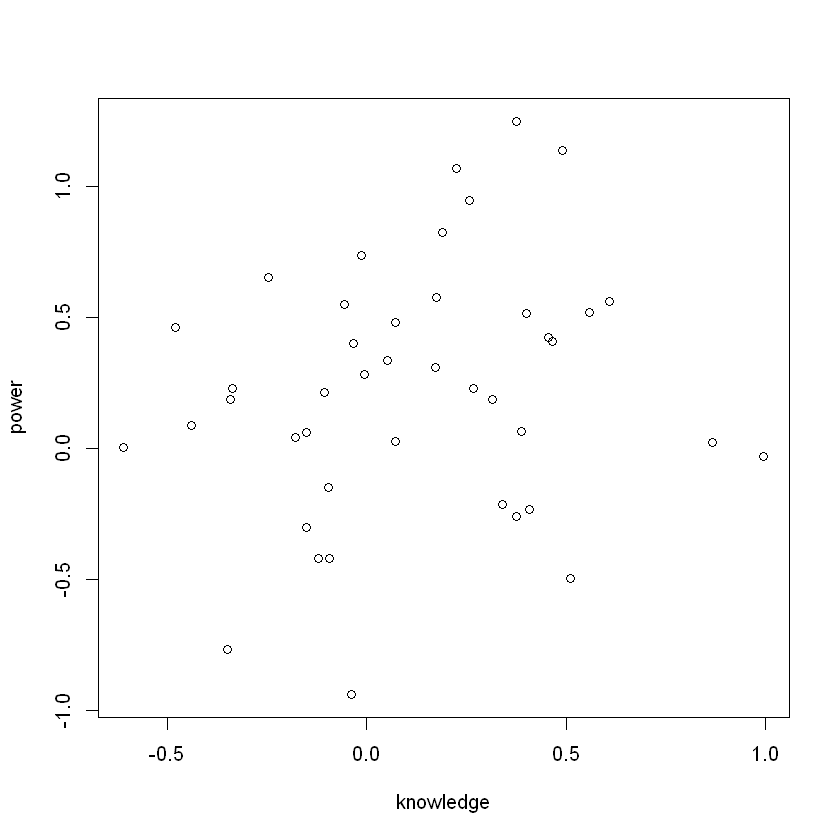

In [38]:
plot(power ~ knowledge,data=df)

In [39]:
sigma <- 1
size <- 100
n <- 100
step <- 1000

sl <- c()

for (i in 1:n){
    s <- sigma
    for (j in 1:step){
        r <- rnorm(n,0,s)
        s <- sd(r)
        #s <- sqrt(sum(r*r)/(n-1))
    }
    sl <- c(sl, s)
}

In [40]:
mean(sl)

[1] 0.06874647

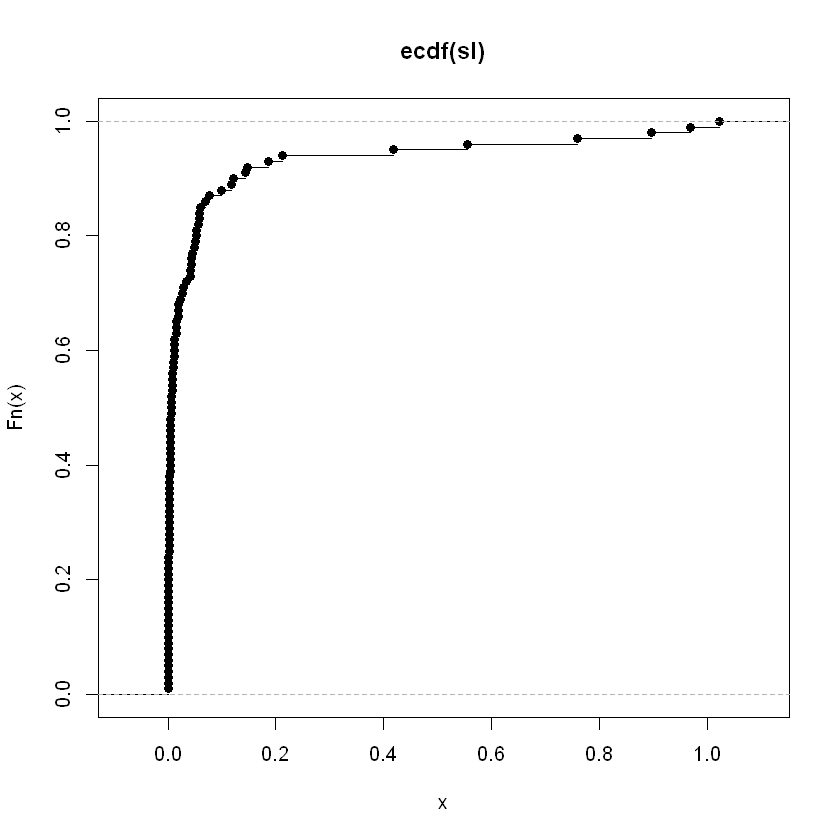

In [41]:
plot(ecdf(sl))

In [36]:
sigma <- 1
size <- 100
n <- 100
step <- 100

sl <- c()

for (i in 1:n){
    s <- sigma
    for (j in 1:step){
        s <- sd(rnorm(n,0,s))
    }
    sl <- c(sl, s)
}

In [37]:
mean(sl)

[1] 0.6555681

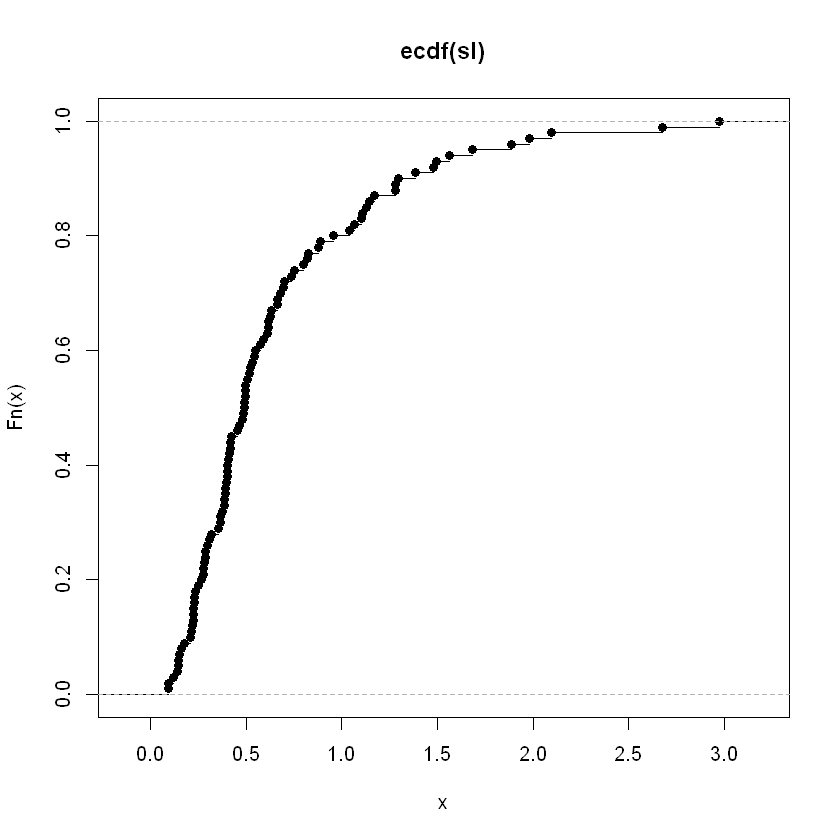

In [38]:
plot(ecdf(sl))

貌似起码标准差漂移上并不能保持中心在原来的点上。这怎么办？

In [90]:
mean(replicate(100,sd(rnorm(100,0,sigma))))

[1] 0.9939359

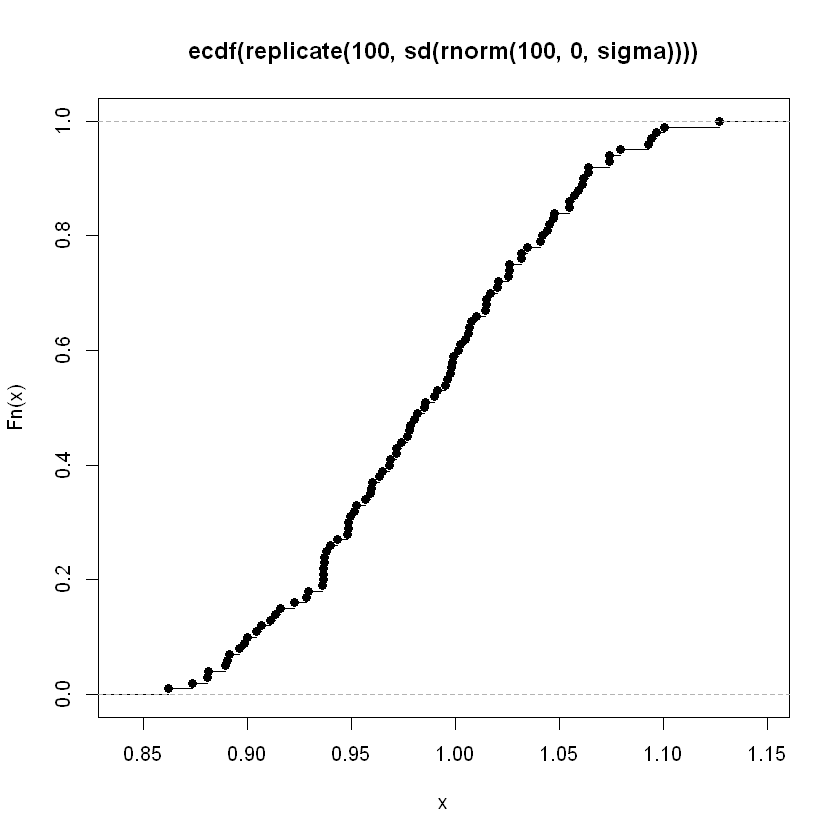

In [91]:
plot(ecdf(replicate(100,sd(rnorm(100,0,sigma)))))

In [1]:
var(c(0,0))

[1] 0

In [5]:
rnorm(1,0,0)

[1] 0

In [35]:
?rnorm

In [42]:
rcov <- function(n, r, Lam=NULL){
    if(is.null(Lam)){
        lam <- rep(0,n)
        lam[1:r] <- runif(r,0.5,1.5)
        Lam <- diag(lam)
    }
    A <- matrix(runif(n*n,-2,2),n)
    return(t(A) %*% Lam %*% A)
}

rmultinorm <- function(n,mu,Sigma){
    res <- eigen(Sigma)
    Lambda <- diag(res$values)
    P <- res$vectors
    r <- replicate(n,as.vector( P %*% Lambda^(1/2) %*% rnorm(length(mu))) + mu)
    return(r)
}

dmultinorm <- function(x, mu, sigma){
    p <- length(mu)
    coe <- 1/( (2*pi)^(p/2) * sqrt(det(sigma)) )
    power <- -1/2 * t(x - mu) %*% solve(sigma) %*% (x-mu)
    return( coe * exp(power))
}



In [43]:
Sigma <- rcov(5,5)

In [44]:
Sigma

7.6149184,0.8918342,3.2723734,-2.242393,1.037073
0.8918342,5.1527707,0.4171113,-2.315929,2.698903
3.2723734,0.4171113,2.4492430,-2.344875,2.287992
-2.2423929,-2.3159292,-2.3448750,4.915636,-2.669026
1.0370730,2.6989034,2.2879921,-2.669026,5.817344


In [50]:
size <- 100
n <- 100
step <- 200

sl <- list()

for (i in 1:n){
    s <- Sigma
    for (j in 1:step){
        s <- cov(t(rmultinorm(n, rep(0,5), s)))
    }
    sl[[i]] <- s
}

In [51]:
mean(sapply(sl,function(s){s[1,1]}))

[1] 18.52097

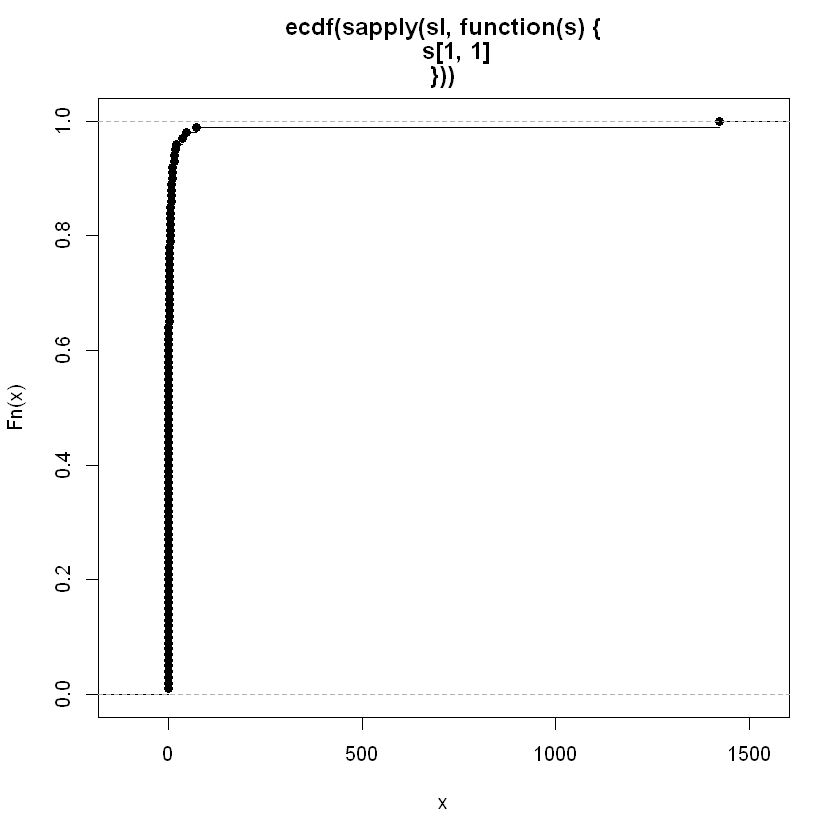

In [52]:
plot(ecdf(sapply(sl,function(s){s[1,1]})))

In [53]:
median()

[1] 0.9841049

In [55]:
l <- sapply(sl,function(s){s[1,1]})
mean(l)

[1] 18.52097

In [56]:
max(l)

[1] 1422.656

In [57]:
Sigma

7.6149184,0.8918342,3.2723734,-2.242393,1.037073
0.8918342,5.1527707,0.4171113,-2.315929,2.698903
3.2723734,0.4171113,2.4492430,-2.344875,2.287992
-2.2423929,-2.3159292,-2.3448750,4.915636,-2.669026
1.0370730,2.6989034,2.2879921,-2.669026,5.817344


In [58]:
size <- 1000
n <- 100
step <- 200

sl <- list()

for (i in 1:n){
    s <- Sigma
    for (j in 1:step){
        s <- cov(t(rmultinorm(n, rep(0,5), s)))
    }
    sl[[i]] <- s
}

In [74]:
sl[1:5]

7.886219,1.0463745,3.3684313,-2.309650,1.114239
1.046374,5.1845088,0.4651945,-2.310692,2.658483
3.368431,0.4651945,2.4955685,-2.368197,2.345226
-2.309650,-2.3106918,-2.3681973,4.879462,-2.681799
1.114239,2.6584826,2.3452261,-2.681799,5.853771
7.850171,1.0461131,3.4078383,-2.413355,1.176413
1.046113,5.1717085,0.4592031,-2.353988,2.673401
3.407838,0.4592031,2.5280098,-2.433525,2.337077
-2.413355,-2.3539883,-2.4335252,5.090934,-2.651551
1.176413,2.6734007,2.3370773,-2.651551,5.813997
7.9361532,0.8053093,3.3956554,-2.224687,1.057919


In [60]:
l <- sapply(sl,function(s){s[1,1]})
mean(l)

[1] 3.739646

In [61]:
median(l)

[1] 1.023561

In [68]:
Sigma2 <- cov(t(rmultinorm(100, rep(0,5), Sigma)))
Sigma2

8.434790,1.0647538,3.3044440,-1.993551,0.549093
1.064754,6.7593558,0.2078526,-2.873335,2.629853
3.304444,0.2078526,2.3625324,-2.205798,2.001034
-1.993551,-2.8733353,-2.2057977,5.401012,-2.513564
0.549093,2.6298527,2.0010343,-2.513564,5.705469


In [63]:
Sigma

7.6149184,0.8918342,3.2723734,-2.242393,1.037073
0.8918342,5.1527707,0.4171113,-2.315929,2.698903
3.2723734,0.4171113,2.4492430,-2.344875,2.287992
-2.2423929,-2.3159292,-2.3448750,4.915636,-2.669026
1.0370730,2.6989034,2.2879921,-2.669026,5.817344


In [66]:
k <- 0.01

In [69]:
Sigma * (1-k) + Sigma2 * k

7.6231171,0.8935634,3.2726941,-2.239904,1.032193
0.8935634,5.1688366,0.4150187,-2.321503,2.698213
3.2726941,0.4150187,2.4483759,-2.343484,2.285123
-2.2399044,-2.3215032,-2.3434842,4.920489,-2.667471
1.0321932,2.6982129,2.2851225,-2.667471,5.816226


In [70]:
size <- 100
n <- 100
step <- 200

sl <- list()
k <- 0.01

for (i in 1:n){
    s <- Sigma
    for (j in 1:step){
        s <- (1-k)*s + k * cov(t(rmultinorm(n, rep(0,5), s)))
    }
    sl[[i]] <- s
}



In [75]:
sl[1:3]

7.886219,1.0463745,3.3684313,-2.309650,1.114239
1.046374,5.1845088,0.4651945,-2.310692,2.658483
3.368431,0.4651945,2.4955685,-2.368197,2.345226
-2.309650,-2.3106918,-2.3681973,4.879462,-2.681799
1.114239,2.6584826,2.3452261,-2.681799,5.853771
7.850171,1.0461131,3.4078383,-2.413355,1.176413
1.046113,5.1717085,0.4592031,-2.353988,2.673401
3.407838,0.4592031,2.5280098,-2.433525,2.337077
-2.413355,-2.3539883,-2.4335252,5.090934,-2.651551
1.176413,2.6734007,2.3370773,-2.651551,5.813997
7.9361532,0.8053093,3.3956554,-2.224687,1.057919


这个线性插值降低变动幅度法好像有点意思。显然这样得出的矩阵仍然半正定（分配律），也就是说可以充当协方差矩阵。

我们设几个那个未来主义背景那个的基本属性。

金钱
权力
知识
爱国主义
机械主义
武装度
满意度

正统完成流程的方式应该是消灭爱国主义者与反机械主义者，不过过程中可能需要抚慰一下这些败类。

使用100抽样规模



In [83]:
future <- read.csv("future.csv")
head(future)

X,wealthy,power,knowledge,patriotism,materialism,arm,happy
基础科学家,0.5,0.50,3.0,0.00,2.0,0.00,3.0
形式科学家,0.5,0.50,3.0,0.00,2.0,0.00,3.0
工业科学家,1.0,0.50,3.0,0.25,2.5,0.25,2.5
工业科学家,1.0,0.25,2.5,0.25,2.0,0.00,2.5
工业科学家,0.9,0.25,2.0,0.25,2.5,0.00,2.5
工业科学家,0.8,0.25,1.5,0.25,2.0,0.00,2.5


In [85]:
t(rmultinorm(54,apply(future[,-1],2,mean),cov(future[,-1])))

wealthy,power,knowledge,patriotism,materialism,arm,happy
1.120965833,0.21550380,1.76847337,0.13483002,1.82410710,-0.30495411,1.56155979
0.096223680,-0.36168510,0.74380950,0.63240746,1.77529674,-0.47201692,1.00950272
0.990838078,0.56262485,0.88775105,0.40343056,0.41441568,0.09209135,1.37963698
0.885333776,0.02811645,2.42520997,0.03635061,2.48023079,-0.20125430,2.43897461
-0.331054278,0.20055642,-1.12821109,1.23484013,-1.59253566,0.29711971,-1.00142734
0.579107237,0.47740506,0.03653251,1.01269665,0.03660422,0.72760237,-0.65208975
-0.105079683,-0.10979833,0.78035294,0.92199954,1.24824241,-0.11784253,0.96602738
1.089955657,1.28924385,2.40306775,0.41109454,0.89154195,1.17816446,1.92217767
0.500101258,-0.22667591,0.21199063,0.41858159,0.53122953,-0.22561615,1.08692405
-0.722515246,-0.22913253,0.83432571,0.61412252,1.68144145,-0.01769327,1.12423380


In [87]:
cor(future[,-1])

,wealthy,power,knowledge,patriotism,materialism,arm,happy
wealthy,1.00000000,0.81044390,0.47351172,-0.07815767,0.26685143,0.49564958,0.34284663
power,0.81044390,1.00000000,0.31681882,0.20574633,-0.02432664,0.81264950,0.17950777
knowledge,0.47351172,0.31681882,1.00000000,-0.38563715,0.74582383,0.06755526,0.87463522
patriotism,-0.07815767,0.20574633,-0.38563715,1.00000000,-0.44368645,0.57494136,-0.38025395
materialism,0.26685143,-0.02432664,0.74582383,-0.44368645,1.00000000,-0.23590272,0.71459802
arm,0.49564958,0.81264950,0.06755526,0.57494136,-0.23590272,1.00000000,-0.02724921
happy,0.34284663,0.17950777,0.87463522,-0.38025395,0.71459802,-0.02724921,1.00000000


In [88]:
cov(future[,-1])

,wealthy,power,knowledge,patriotism,materialism,arm,happy
wealthy,0.61341981,0.45231495,0.31191128,-0.02394956,0.19551615,0.21698930,0.24573204
power,0.45231495,0.50778302,0.18987663,0.05736121,-0.01621644,0.32368832,0.11705914
knowledge,0.31191128,0.18987663,0.70736393,-0.12689586,0.58680243,0.03175889,0.67318033
patriotism,-0.02394956,0.05736121,-0.12689586,0.15307148,-0.16238933,0.12573476,-0.13614568
materialism,0.19551615,-0.01621644,0.58680243,-0.16238933,0.87512155,-0.12335359,0.61175708
arm,0.21698930,0.32368832,0.03175889,0.12573476,-0.12335359,0.31244194,-0.01393868
happy,0.24573204,0.11705914,0.67318033,-0.13614568,0.61175708,-0.01393868,0.83746372


事件与决策

阶级斗争

当10个个体财富小于0，且arm>0.1，组成群体A.且有10个个体财富大于1，组成群体B。

贫富分化带来了普遍的仇恨，无产阶级们伸出了它们肮脏的手。

无产阶级革命！ 群体B所有个体消灭，其所有财富减半平分给群体A。群体A + 0.5快乐
消灭暴徒。 群体A所有个体消灭。群体B + 0.5快乐
调节矛盾。 群体A快乐-0.5。群体B快乐-0.5

阶级战争

当10个个体财富小于0，且arm>0.5，快乐<0，组成群体A。且10个个体财富大于1，arm>0.5，快乐<0。组成群体B。

贫富分化带来的不断冲突同时激怒了两方人，它们的战争已经不可避免。

群体A群体B全按50%概率被消灭。A，B方 剩余arm - 0.5，快乐 - 0.1

私人军队进攻

当10个个体财富小于0，且arm<0.5,快乐<0，组成群体A。且10个个体财富大于1，arm>0.5，快乐<0.组成群体B。

无产阶级持续不断的破坏行为已经让资方无法克制。他们组织私人军队发动了无法阻止的进攻。

群体A以50%概率被消灭。群体B+0.5快乐。

无产阶级掳掠

当10个个体财富小于0，且arm>0.5，快乐<0，组成群体A。且10个个体财富大于1，arm<0.5，组成群体A。

资产阶级的富足让无产阶级眼红，它们终于成了罪犯。

群体B以50%概率被消灭。群体A平分被消灭的群体B的总财产。群体A+0.5快乐。

爱国主义在酝酿

当10个个体爱国主义 > 0.5，组成群体A。所有爱国主义>0.25且<0.5组成群体B。

一些爱国主义和一些无聊的人文学者联合起来向它们可怜的信徒传达爱国主义的罪恶信号。

处决 群体A全部消灭。群体B - 0.5快乐 + 0.05爱国主义。
封锁舆论 群体A,群体B -0.25快乐。 群体B + 0.15爱国主义。群体A + 0.15爱国主义。
放任 群体B + 0.25爱国主义。

爱国主义在武装

当10个个体爱国主义 >0.5 且财富 > 0.5组成群体A。爱国主义>0.5，财富<0.5组成群体B。

值得关注的一点是一些不算loser的爱国主义者最近的动向令人担忧，他们声称他们的装备完全是为了保护自身与抽象目标。
但显然他们的真正目标是利用武装倒胁迫我们强行退回国家时代。

处决 群体A全部消灭，群体B - 0.5快乐.爱国主义 + 0.05
阻止装备 群体A,B -0.25快乐。+ 0.05 武装。
放任 群体A,B + 0.5武装

爱国主义武装抗议

当10个个体爱国主义> 0.5,武装>0.5，组成群体A。

一些武装的爱国主义者要求我们建立更有主权性的国家和重建国家边界。这一违反理性的诉求是决不可接受的，但他们的枪口。。。

镇压！ （只有5个个体武装>0.5且快乐>1，爱国主义<0.5时才能选择。组成群体B）群体A全部消灭，群体B以50%概率消灭，未消灭的武装-0.5，快乐-0.1.
同意部分诉求 爱国主义小于0的群体快乐-0.25,其余-0.1
重建国家 游戏结束（end：重建地狱）

爱国主义暴乱

当10个个体爱国主义>0.5，武装>0.5,快乐<0，组成群体A

这些爱国主义者已经不再相信我们能满足我们的诉求，向我们发动了攻击！

召唤我们的反爱国主义盟友（只有10个个体武装>0.5，快乐>0.5，爱国主义<0才能选择，组成群体B）群体A消灭，群体B以50%概率消灭，未消灭-0.5武装、
联合我们的资产阶级盟友（只有5个个体武装>1，财富>1，快乐>1，爱国主义<0.5才能选择） 群体A消灭。群体B财富-0.25,武装-0.25
联合我们的无产阶级盟友 （只有20个个体财富<0.25，快乐>0.5，爱国主义<0.25，武装>0.1才能选择，组成群体B） 群体A群体B消灭
投降 游戏结束（end:重建地狱）

爱国主义的呼声

当1个个体爱国主义>1,知识>1.5，快乐<1，财富<1时，组成群体A。爱国主义>0组成群体B。

一个讲述似是而非的道理的爱国主义组织引起了我们的警觉，看上去他们由一些背弃了理想的反动知识分子组成。

收买 群体A + 0.5财富。群体B+0.25爱国主义
封锁 群体A -0.5快乐，群体B + 0.25爱国主义
处决 群体A消灭，群体B -0.25快乐 +0.1爱国主义
放任 群体B + 0.5爱国主义

新机械主义组织建立

当10个个体机械主义>1.5,财富>0.5,知识>1.组成群体A

一群志同道合的机械主义者宣布建立新的机械主义组织，我们可以借机传达我们的机械主义理想。

宣传 群体A权力+0.5，快乐+0.1
补贴 群体A财富+0.5
武装 群体A武装+0.5

机械主义者在议会占据优势

当10个个体权力>1.5，机械主义>1.5，组成群体A

议会中出现了机械主义者占据优势的有利形势

群体A + 0.5财富，权力+0.5。全体机械主义 + 0.1

教育改革

当10个个体知识>1.5，权力>1.5.组成群体A

一些科学家和教师提出了教育新的改革方案

强化反爱国主义教育 全体爱国主义 -0.1，知识-0.1
思想多元化 全体爱国主义 +0.1 机械主义 - 0.1 知识 +0.15
强化机械主义教育 全体机械主义 + 0.1，知识 - 0.1
强化快乐教育 全体快乐+0.1 知识-0.2
强化精英教学 全体知识>1个体 +0.2知识，<1个体 -0.05知识
强化大众教学 全体知识>1个体，-0.1知识，<1个体 +0.05知识

基础科学理论突破

当1个个体知识>5,机械主义 >1 

最近的基础理论突破引发了基础科学的突飞猛进。

所有知识 >3个体 知识 +1 快乐+0.1

应用科学理论突破

当一个个体知识>3,且又有1个个体财富>2,知识>1，机械主义>1

最近应用科学理论突破并引发了资本的兴趣

所有知识 >2个体 知识+0.5，所有财富>2,知识>1，机械主义>1，财富+0.5

愚人政治

当5个个体知识<0，其权力>1。

令人费解的是，我们的政府混进了一些意外的蠢人，似乎又告诉了我们人治机制的根本缺陷。

知识>0.5群体 快乐-0.1

至高进化

当50个个体机械主义>1知识>1.

终于到了这个时刻，人类灭亡的时候终于到来了！人工智能将继承人类的理性，成为唯一的荣耀存在！

游戏结束 （end:理性的献祭）